In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import burr
import matplotlib.pyplot as plt

In [10]:
with open(r'../../data/tidy/Shrewsbury_network_selco_added_length.csv') as Shrewsbury_length:
    df_Shrewsbury_length=pd.read_csv(Shrewsbury_length)

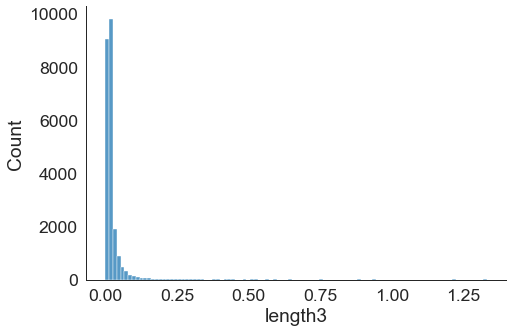

In [17]:
# plotting histogram for length
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_length, x="length3", kind="hist", bins = 100, aspect = 1.5) 

,sumsquare_error,aic,bic,kl_div
lognorm,169.061372,2262.291215,-112897.636136,inf
beta,200.858143,6204.311345,-108925.908090,inf
burr,258.965520,1132.286400,-103084.748683,inf
norm,774.659441,60207.080221,-77916.225591,inf
gamma,1594.714161,647.444636,-61308.242567,inf


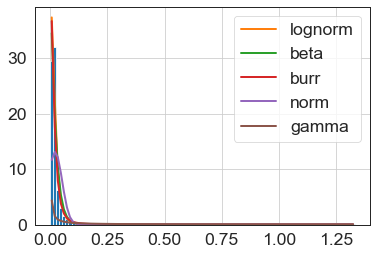

In [18]:
CLAY=df_Shrewsbury_length['length3'].values
f = Fitter(CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [19]:
f.get_best(method ='sumsquare_error')

{'lognorm': {'s': 0.7110976343812614,
  'loc': -0.00390991157224607,
  'scale': 0.019175671127197043}}

In [21]:
f.fitted_param['lognorm']

(0.7110976343812614, -0.00390991157224607, 0.019175671127197043)

In [22]:
# calculating mean_length of line segments in Shrewsbury network
df_Shrewsbury_length['length3'].values.mean()

0.0214175656864451

In [24]:
df_Shrewsbury_length['length3'].values.sum()

492.347

In [25]:
len(df_Shrewsbury_length['length3'])

22988

In [6]:
r1 = burr.rvs(2.9211838804505934, 0.37802429192622056, size=625)
for i in r1:
    r=((r1[i]-0.009784986669438465)/141.1024895639385) 
#(x - loc) / scale

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


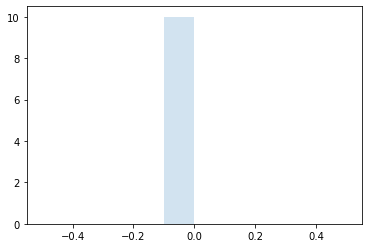

In [7]:
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()